In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("success_data.csv", index_col=0)
df.head()

,Processed Title,Release Date,Production Budget ($),Domestic Gross ($),Worldwide Gross ($),Domestic ROI (%),Worldwide ROI (%)
Avatar,Avatar,"Dec 18, 2009",425000000,760507625.0,2.776345e+09,78.942971,553.257713
The Dark Knight Rises,"Dark-Knight-Rises,-The","Jul 20, 2012",275000000,448139099.0,1.084439e+09,62.959672,294.341491
The Avengers,"Avengers,-The","May 4, 2012",225000000,623279547.0,1.517936e+09,177.013132,574.638176
Pirates of the Caribbean: Dead Man's Chest,Pirates-of-the-Caribbean-Dead-Man's-Chest,"Jul 7, 2006",225000000,423315812.0,1.066216e+09,88.140361,373.873694
Men in Black 3,Men-in-Black-3,"May 25, 2012",215000000,179020854.0,6.542135e+08,-16.734487,204.285342


In [2]:
df.shape

(653, 7)

Let's go with `Worldwide ROI` for now

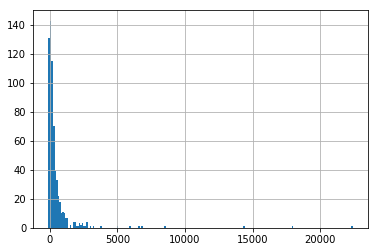

In [3]:
df["Worldwide ROI (%)"].hist(bins=200)
plt.show()

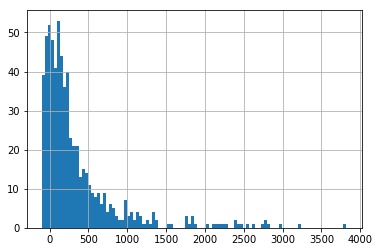

In [4]:
df["Worldwide ROI (%)"][df["Worldwide ROI (%)"] < 5000].hist(bins=100)
plt.show()

It looks like most of the movies are making about between -100% and 500%. We have also quite few outliers. TODO: Think how to best discretize this. For now, let's just go with sucessfull and unsucessfull, to see the balance.

In [9]:
df["Success"] = df.apply(lambda row: 1 if row["Worldwide ROI (%)"] > 100 else 0, axis=1)
df.to_csv('Success_on_worldROI.csv',index=False)

1    424
0    229
Name: Success, dtype: int64

In [6]:
df.loc["Speed Racer"]

Processed Title          Speed-Racer
Release Date             May 9, 2008
Production Budget ($)      120000000
Domestic Gross ($)       4.39458e+07
Worldwide Gross ($)      9.33945e+07
Domestic ROI (%)            -63.3785
Worldwide ROI (%)           -22.1713
Success                            0
Name: Speed Racer, dtype: object

In [7]:
df["Success"].value_counts()

1    574
0    121
Name: Success, dtype: int64

Well, it is not that bad. I was honestly expecting less unsuccessful movies. So if we use this data and this target, our model will need to beat a

In [8]:
df["Success"].value_counts()[1]/df.shape[0]

0.8258992805755395

accuracy (which would be obtained by classifying all of them as sucessful). Also, we need to take into account that in this case, false positives (classifying a script as sucessful when it will not be) is much worse than false negatives. I think movie studios would rather miss out on a few movies that would have been successful, than risk producing many unsuccessful movies. 

## Smarter discretization

In [11]:
def discretize(row):
    if row["Worldwide ROI (%)"] > 100:
        return 3
    elif 100 > row["Worldwide ROI (%)"] > 25:
        return 2
    elif 25 > row["Worldwide ROI (%)"] > -25:
        return 1
    else:
        return 0

df["Success"] = df.apply(discretize, axis=1)
df.head()

,Processed Title,Release Date,Production Budget ($),Domestic Gross ($),Worldwide Gross ($),Domestic ROI (%),Worldwide ROI (%),Success
Avatar,Avatar,"Dec 18, 2009",425000000,760507625.0,2.776345e+09,78.942971,553.257713,3
The Dark Knight Rises,"Dark-Knight-Rises,-The","Jul 20, 2012",275000000,448139099.0,1.084439e+09,62.959672,294.341491,3
The Avengers,"Avengers,-The","May 4, 2012",225000000,623279547.0,1.517936e+09,177.013132,574.638176,3
Pirates of the Caribbean: Dead Man's Chest,Pirates-of-the-Caribbean-Dead-Man's-Chest,"Jul 7, 2006",225000000,423315812.0,1.066216e+09,88.140361,373.873694,3
Men in Black 3,Men-in-Black-3,"May 25, 2012",215000000,179020854.0,6.542135e+08,-16.734487,204.285342,3


In [12]:
df["Success"].value_counts()

3    424
2     83
0     76
1     70
Name: Success, dtype: int64